In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


How many reservations were cancelled per hotel type ?

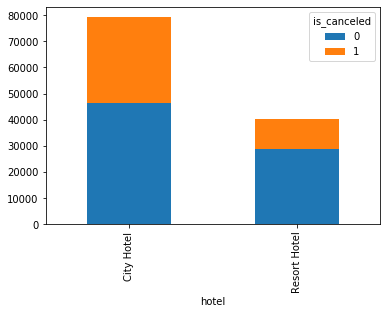

In [3]:
df = hotel.groupby(['hotel','is_canceled'])['hotel'].count().unstack('is_canceled').fillna(0)
df.plot(kind = 'bar', stacked = True)

In [4]:
total = hotel['is_canceled'].sum()
print('Total number of cancellations are:',total)

Resort_Canceled = hotel.loc[hotel['hotel'] == 'Resort Hotel']['is_canceled'].sum()
#print(Resort_Canceled)

hotel_Canceled = hotel.loc[hotel['hotel'] == 'City Hotel']['is_canceled'].sum()
#print(hotel_Canceled)


# Percentage cancelations

resort_percent = Resort_Canceled/total*100
print('Resort hotels have',resort_percent,'percentage cancelations in total' )

hotel_percent = hotel_Canceled/total*100
print('City hotels have',hotel_percent,'percentage cancelations in total' )




Total number of cancellations are: 44224
Resort hotels have 25.149240231548482 percentage cancelations in total
City hotels have 74.85075976845152 percentage cancelations in total


Number of cancelations per month

In [5]:
df2 = hotel.groupby('arrival_date_month')['is_canceled'].apply(lambda x : (x == 1).sum()).reset_index(name = 'count')
df2.sort_values(by = ['count'], ascending = False)

,arrival_date_month,count
1,August,5239
5,July,4742
8,May,4677
6,June,4535
0,April,4524
10,October,4246
11,September,4116
7,March,3149
3,February,2696
2,December,2371


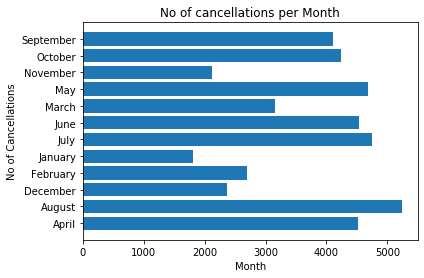

In [6]:
fig ,ax = plt.subplots()
plt.barh(df2['arrival_date_month'],df2['count'])
plt.xlabel('Month')
plt.ylabel('No of Cancellations')
plt.title('No of cancellations per Month')
plt.show()

In [7]:
df4 = hotel.groupby('deposit_type')['is_canceled'].apply(lambda x : (x ==1).sum()).reset_index(name = 'No of cancellations')
df4 = df4.sort_values(by = 'No of cancellations', ascending = False)
df4


,deposit_type,No of cancellations
0,No Deposit,29694
1,Non Refund,14494
2,Refundable,36


Number of cancellations per Deposit type

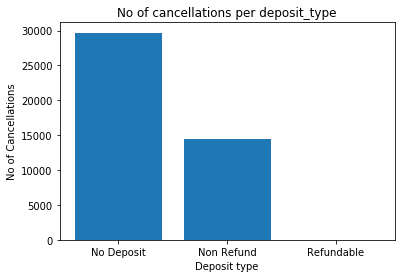

In [8]:
fig ,ax = plt.subplots()
plt.bar(df4['deposit_type'],df4['No of cancellations'])
plt.xlabel('Deposit type')
plt.ylabel('No of Cancellations')
plt.title('No of cancellations per deposit_type')
plt.show()

Correlation of the numerical variables with cancellation status

In [9]:
Cancel_correlation = hotel.corr()['is_canceled']
Cancel_correlation.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

reservation_status                0.917196
deposit_type                      0.468634
lead_time                         0.293123

These are top 3 correlated features

In [10]:
## Missing data handling 

hotel.isnull().sum()



hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
### data preprocessing 
#hotel['agent'].isnull().value_counts()
mean = hotel['agent'].mean()
hotel['agent'].fillna(mean, inplace = True)

med = hotel['company'].median()
hotel['company'].fillna(med, inplace = True)
hotel.country = hotel.country.astype('str')

hotel['children'].fillna(0, inplace = True)

 
## preprocessing categorical variables

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
hotel['hotel'] = encoder.fit_transform(hotel['hotel'])
hotel['arrival_date_year'] = encoder.fit_transform(hotel['arrival_date_year'])
hotel['arrival_date_month'] = encoder.fit_transform(hotel['arrival_date_month'])
hotel['country'] = encoder.fit_transform(hotel['country'])
hotel['market_segment'] = encoder.fit_transform(hotel['market_segment'])
hotel['distribution_channel'] = encoder.fit_transform(hotel['distribution_channel'])
hotel['reserved_room_type'] = encoder.fit_transform(hotel['reserved_room_type'])
hotel['assigned_room_type'] = encoder.fit_transform(hotel['assigned_room_type'])
hotel['deposit_type'] = encoder.fit_transform(hotel['deposit_type'])
hotel['customer_type'] = encoder.fit_transform(hotel['customer_type'])
hotel['reservation_status'] = encoder.fit_transform(hotel['reservation_status'])
hotel['reservation_status_date'] = encoder.fit_transform(hotel['reservation_status_date'])
hotel['meal'] = encoder.fit_transform(hotel['meal'])

In [12]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,0,5,27,1,0,0,2,...,0,86.693382,179.0,0,2,0.0,0,0,1,121
1,1,0,737,0,5,27,1,0,0,2,...,0,86.693382,179.0,0,2,0.0,0,0,1,121
2,1,0,7,0,5,27,1,0,1,1,...,0,86.693382,179.0,0,2,75.0,0,0,1,122
3,1,0,13,0,5,27,1,0,1,1,...,0,304.000000,179.0,0,2,75.0,0,0,1,122
4,1,0,14,0,5,27,1,0,2,2,...,0,240.000000,179.0,0,2,98.0,0,1,1,123


In [13]:
X = hotel.drop('is_canceled', axis = 1)
y = hotel['is_canceled']

In [14]:
# Spliting dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,y,train_size= 0.80,test_size= 0.20 ,random_state= 80)


In [26]:
## Model bulilding 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(x_train)


model = RandomForestClassifier(n_jobs= -1)
model.fit(scaled_X,y_train)


## Validation test dataset

scaled_test = scaler.fit_transform(x_test)
predictions = model.predict(scaled_test)

Accuracy = accuracy_score(y_test,predictions)
accracy_matrix = confusion_matrix(y_test,predictions)
print('Model Accuracy is :', Accuracy)
print(accracy_matrix)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Accuracy is : 0.9998324817823938
[[14951     0]
 [    4  8923]]


Text(0.5, 0, 'Relative Importance')

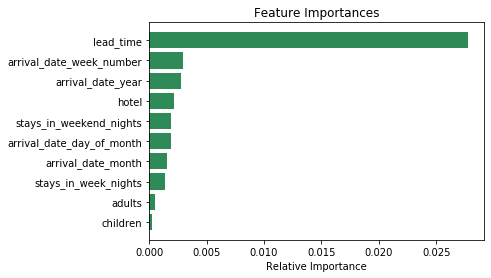

In [35]:
features= X.columns
importances = model.feature_importances_[:10]
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='seagreen', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')